In [41]:
import pandas as pd
from google.colab import files
from IPython.display import display
import numpy as np
import matplotlib.pyplot as plt

In [42]:
subir=files.upload()
nome_arquivo=list(subir.keys())[0]
print(nome_arquivo)

Saving concessionaria.xlsx to concessionaria (2).xlsx
concessionaria (2).xlsx


In [52]:
tb = pd.read_excel("concessionaria.xlsx")
display(tb)

,ID_Cliente,Idade,Gênero,Cidade,Renda_Anual_BR,Modelo_Comprado,Data_Compra,Preco_Tabela_Milhoes,Desconto_Percentual,Preco_Final_Milhoes,Tipo_Financiamento,Anos_Propriedade_Esperados,Revisoes_Por_Ano,Satisfacao_1a10,Nivel_Fidelidade
0,1,56,M,Porto Alegre,409060,Porsche 911 Turbo S,2021-03-20,3.2,0.142,2.746,Financed,4,2,10,Silver
1,2,69,F,Rio de Janeiro,394407,BMW i7,2020-01-26,1.9,0.016,1.870,Cash,9,1,3,Silver
2,3,46,O,Curitiba,312218,Porsche 911 Turbo S,2023-10-05,3.2,0.023,3.126,Cash,4,0,3,Platinum
3,4,32,M,Salvador,583283,Bentley Continental GT,2019-09-12,4.0,0.142,3.432,Cash,2,0,1,Silver
4,5,60,F,Salvador,721290,BMW i7,2023-03-10,1.9,0.110,1.691,Cash,6,2,10,Platinum
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
995,996,78,F,Brasília,643347,Aston Martin DBX,2023-07-21,3.5,0.101,3.146,Cash,7,2,4,Silver
996,997,23,M,Campinas,520724,Range Rover Autobiography,2021-08-20,2.5,0.089,2.278,Cash,5,4,9,Gold
997,998,35,M,São Paulo,464331,Bentley Continental GT,2018-08-22,4.0,0.090,3.640,Cash,2,2,9,Silver
998,999,68,M,Recife,392690,Lamborghini Urus,2025-04-15,4.5,0.102,4.041,Cash,9,0,2,Gold


In [44]:
print (f'media da Idade: {tb ["Idade"].mean():.2f}')
print (f'mediana: {tb ["Idade"].median():.2f}')

media da Idade: 50.38
mediana: 50.00


In [45]:
print (f'media da Renda: {tb ["Renda_Anual_BR"].mean():.2f}')

media da Renda: 553146.35


In [51]:
print(f'media de satisfacao: {tb ["Satisfacao_1a10"].mean():.2f}')

media de satisfacao: 5.46


In [54]:
compras_por_cidade=(tb.groupby("Cidade")["ID_Cliente"]
                    .count()
                    .reset_index()
                    .rename(columns={"ID_Cliente":"Quantidade"})
                    .sort_values("Quantidade", ascending=False)
                    .reset_index(drop=True))

In [56]:
print("total de vendas por cidade:\n")
display(compras_por_cidade)

total de vendas por cidade:



,Cidade,Quantidade
0,Belo Horizonte,115
1,Curitiba,107
2,Brasília,103
3,Porto Alegre,103
4,Recife,102
5,Fortaleza,101
6,Salvador,96
7,Rio de Janeiro,95
8,Campinas,91
9,São Paulo,87


In [60]:
cidade_top=compras_por_cidade.iloc[0]["Cidade"]
Quantidade_top=compras_por_cidade.iloc[0]["Quantidade"]
print("cidade com mais vendas:\n",cidade_top)
print("quantidade de vendas na cidade:\n",Quantidade_top)
cidade_top, int(Quantidade_top)

cidade com mais vendas:
 Belo Horizonte
quantidade de vendas na cidade:
 115


('Belo Horizonte', 115)

Axes(0.22375,0.11;0.5775x0.77)


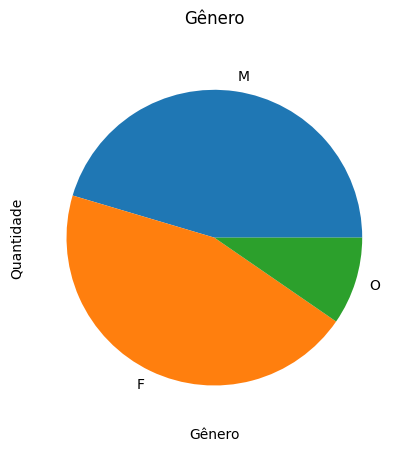

In [57]:
print(tb["Gênero"].value_counts().plot(kind="pie", title="Gênero"))
plt.ylabel("Quantidade")
plt.xlabel("Gênero")
plt.grid(True)
plt.show()

In [61]:
compras_de_veiculo=(tb.groupby("Modelo_Comprado")["ID_Cliente"]
                    .count()
                    .reset_index()
                    .rename(columns={"ID_Cliente":"Quantidade"})
                    .sort_values("Quantidade", ascending=False)
                    .reset_index(drop=True))

In [62]:
print("total de veiculos comprados:\n")
display(compras_de_veiculo)

total de veiculos comprados:



,Modelo_Comprado,Quantidade
0,Ferrari 296 GTB,112
1,Porsche 911 Turbo S,105
2,Rolls‑Royce Ghost,103
3,Aston Martin DBX,103
4,BMW i7,102
5,Bentley Continental GT,101
6,Range Rover Autobiography,101
7,Lamborghini Urus,95
8,Mercedes‑AMG GT,91
9,Tesla Model S Plaid,87


Axes(0.125,0.11;0.775x0.77)


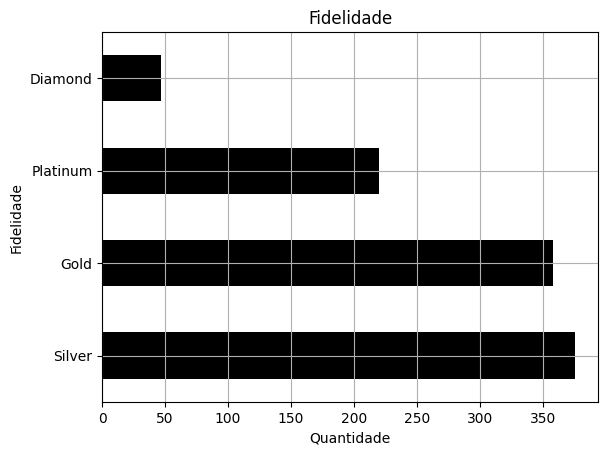

In [64]:
print(tb["Nivel_Fidelidade"].value_counts().plot(kind="barh", title="Fidelidade", color='black'))
plt.ylabel("Fidelidade")
plt.xlabel("Quantidade")
plt.grid(True)
plt.show()